# Transformation

In [1]:
# Imports
import pandas as pd

In [2]:
# Paths
films_path = "../extraction/extracted_data/films_data.csv"
oscars_path = "../extraction/extracted_data/oscars_data.csv"
streaming_path = "../extraction/extracted_data/streaming_data.csv"

films_df = pd.read_csv(films_path)
oscars_df = pd.read_csv(oscars_path)
streaming_df = pd.read_csv(streaming_path)

In [3]:
films_df.head()


,title,year,rating,genres,runtime,director,budget,imdb_id
0,A Complete Unknown,2024,7.3,"['Biography', 'Drama', 'Music']",['141'],"['James Mangold', 'Yesi Ramirez']",NaN,11563598
1,Nickel Boys,2024,6.9,['Drama'],['140'],"['RaMell Ross', 'Victoria Thomas']",NaN,23055660
2,I'm Still Here,2024,8.1,"['Biography', 'Drama', 'History']",['137'],"['Walter Salles', 'Leticia Naveira']",NaN,14961016
3,In the Shadow of the Cypress,2023,7.0,"['Animation', 'Short', 'Drama', 'War']",['20'],"['Hossein Molayemi', 'Shirin Sohani']",NaN,28768883
4,The Substance,2024,7.2,"['Drama', 'Horror', 'Sci-Fi']","['141', '139']","['Coralie Fargeat', 'Laure Cochener']",NaN,17526714


In [4]:
films_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   title     103 non-null    str    
 1   year      103 non-null    int64  
 2   rating    103 non-null    float64
 3   genres    103 non-null    str    
 4   runtime   103 non-null    str    
 5   director  103 non-null    str    
 6   budget    0 non-null      float64
 7   imdb_id   103 non-null    int64  
dtypes: float64(2), int64(2), str(4)
memory usage: 6.6 KB


In [5]:
films_clean = films_df.copy()
films_clean = films_clean.drop_duplicates()
films_clean.columns = films_clean.columns.str.lower().str.replace(" ", "_")
films_clean.isna().sum()

title         0
year          0
rating        0
genres        0
runtime       0
director      0
budget      103
imdb_id       0
dtype: int64

In [6]:
# #removing budget no data for film budget all NaN
films_clean = films_clean.drop(columns=['budget'])
films_clean.columns

Index(['title', 'year', 'rating', 'genres', 'runtime', 'director', 'imdb_id'], dtype='str')

In [7]:
films_clean["runtime"].head()

0           ['141']
1           ['140']
2           ['137']
3            ['20']
4    ['141', '139']
Name: runtime, dtype: str

In [8]:
films_clean[~films_clean["runtime"].str.replace(r"[\[\]]", "", regex=True).str.isnumeric()]

,title,year,rating,genres,runtime,director,imdb_id
0,A Complete Unknown,2024,7.3,"['Biography', 'Drama', 'Music']",['141'],"['James Mangold', 'Yesi Ramirez']",11563598
1,Nickel Boys,2024,6.9,['Drama'],['140'],"['RaMell Ross', 'Victoria Thomas']",23055660
2,I'm Still Here,2024,8.1,"['Biography', 'Drama', 'History']",['137'],"['Walter Salles', 'Leticia Naveira']",14961016
3,In the Shadow of the Cypress,2023,7.0,"['Animation', 'Short', 'Drama', 'War']",['20'],"['Hossein Molayemi', 'Shirin Sohani']",28768883
4,The Substance,2024,7.2,"['Drama', 'Horror', 'Sci-Fi']","['141', '139']","['Coralie Fargeat', 'Laure Cochener']",17526714
...,...,...,...,...,...,...,...
98,Ninety-Five Senses,2022,7.5,"['Animation', 'Short', 'Drama']",['14'],"['Jared Hess', 'Jerusha Hess']",11020596
99,El Conde,2023,6.3,"['Comedy', 'Fantasy', 'History', 'Horror']",['110'],"['Pablo Larraín', 'Eduardo Paxeco']",21113540
100,Invincible,2022,7.1,"['Short', 'Drama']",['30'],"['Vincent René-Lortie', 'Victor Tremblay-Blouin']",22749100
101,Spider-Man: Across the Spider-Verse,2023,8.5,"['Animation', 'Action', 'Adventure', 'Family',...",['140'],"['Joaquim Dos Santos', 'Kemp Powers', 'Justin ...",9362722


In [9]:
#removing longer runtime, assuming one is the directors cut and another theoretical directors cut are always longer.

films_clean["runtime_theatrical"] = ( films_clean["runtime"].astype(str).str.findall(r"\d+").apply(lambda x: min(map(int, x)) 
    if x else None).astype(float)
)

films_clean[["runtime", "runtime_theatrical"]].head()


,runtime,runtime_theatrical
0,['141'],141.0
1,['140'],140.0
2,['137'],137.0
3,['20'],20.0
4,"['141', '139']",139.0


In [10]:
# drop missing
films_clean = films_clean.dropna(subset=["runtime_theatrical"])
films_clean["runtime"] = films_clean["runtime_theatrical"]
films_clean = films_clean.drop(columns=["runtime_theatrical"])

films_clean.columns
films_clean.head()

,title,year,rating,genres,runtime,director,imdb_id
0,A Complete Unknown,2024,7.3,"['Biography', 'Drama', 'Music']",141.0,"['James Mangold', 'Yesi Ramirez']",11563598
1,Nickel Boys,2024,6.9,['Drama'],140.0,"['RaMell Ross', 'Victoria Thomas']",23055660
2,I'm Still Here,2024,8.1,"['Biography', 'Drama', 'History']",137.0,"['Walter Salles', 'Leticia Naveira']",14961016
3,In the Shadow of the Cypress,2023,7.0,"['Animation', 'Short', 'Drama', 'War']",20.0,"['Hossein Molayemi', 'Shirin Sohani']",28768883
4,The Substance,2024,7.2,"['Drama', 'Horror', 'Sci-Fi']",139.0,"['Coralie Fargeat', 'Laure Cochener']",17526714


In [11]:
films_clean["runtime"].describe()


count    103.000000
mean      94.572816
std       51.536319
min        7.000000
25%       34.500000
50%      105.000000
75%      132.500000
max      206.000000
Name: runtime, dtype: float64

In [12]:
films_clean.sort_values("runtime").head(20)
## seems to be some short films about 15 of them maybe we should remove


,title,year,rating,genres,runtime,director,imdb_id
75,Our Uniform,2023,6.7,"['Animation', 'Short']",7.0,['Yegane Moghaddam'],28058015
57,War Is Over!,2023,6.4,"['Animation', 'Short', 'War']",11.0,['Dave Mullins'],29795707
68,Pachyderme,2022,7.0,"['Animation', 'Short', 'Drama']",11.0,['Stéphanie Clément'],20862526
6,Beurk !,2024,6.7,"['Animation', 'Short', 'Family']",13.0,"['Loïc Espuche', 'Florian Delhormeau']",28356173
20,Wander to Wonder,2023,6.7,"['Animation', 'Short', 'Comedy', 'Thriller']",14.0,['Nina Gantz'],28768679
98,Ninety-Five Senses,2022,7.5,"['Animation', 'Short', 'Drama']",14.0,"['Jared Hess', 'Jerusha Hess']",11020596
30,The Man Who Could Not Remain Silent,2024,7.3,"['Short', 'Drama', 'History']",14.0,"['Nebojsa Slijepcevic', 'Hana Hribar']",20519854
44,A Lien,2023,7.2,"['Short', 'Drama']",15.0,"['David Cutler-Kreutz', 'Sam Cutler-Kreutz']",27655666
73,Letter to a Pig,2022,6.5,"['Animation', 'Short']",17.0,['Tal Kantor'],10346066
88,Nai Nai & Wài Pó,2023,7.1,"['Documentary', 'Short', 'Comedy', 'Drama']",17.0,['Sean Wang'],26218316


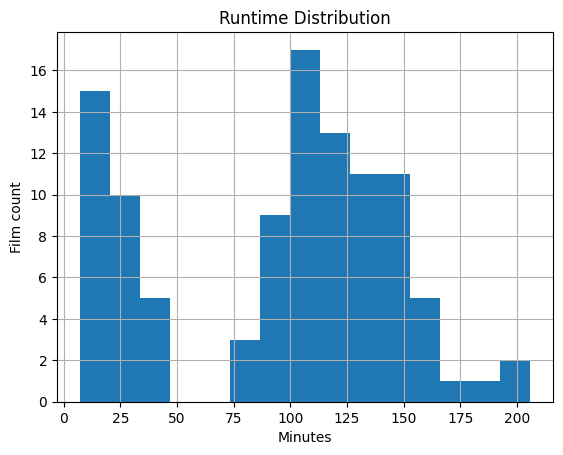

In [13]:
import matplotlib.pyplot as plt

films_clean["runtime"].hist(bins=15)
plt.title("Runtime Distribution")
plt.xlabel("Minutes")
plt.ylabel("Film count")
plt.show()


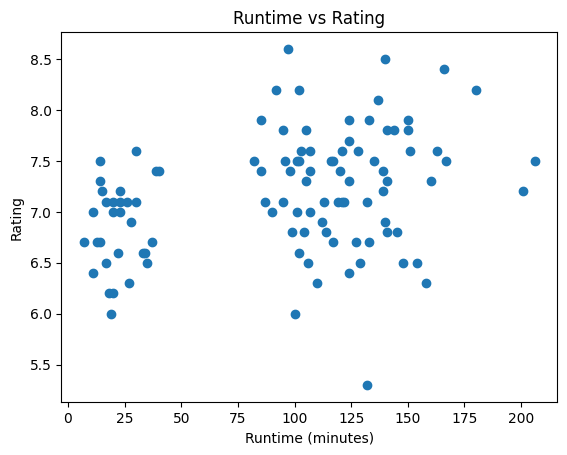

In [14]:
plt.scatter(films_clean["runtime"], films_clean["rating"])
plt.xlabel("Runtime (minutes)")
plt.ylabel("Rating")
plt.title("Runtime vs Rating")
plt.show()


In [15]:
films_clean["runtime"].corr(films_clean["rating"])

np.float64(0.3250678783048246)

In [16]:
import ast

films_clean["genres"] = films_clean["genres"].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

films_clean["director"] = films_clean["director"].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

films_clean.head()


,title,year,rating,genres,runtime,director,imdb_id
0,A Complete Unknown,2024,7.3,"[Biography, Drama, Music]",141.0,"[James Mangold, Yesi Ramirez]",11563598
1,Nickel Boys,2024,6.9,[Drama],140.0,"[RaMell Ross, Victoria Thomas]",23055660
2,I'm Still Here,2024,8.1,"[Biography, Drama, History]",137.0,"[Walter Salles, Leticia Naveira]",14961016
3,In the Shadow of the Cypress,2023,7.0,"[Animation, Short, Drama, War]",20.0,"[Hossein Molayemi, Shirin Sohani]",28768883
4,The Substance,2024,7.2,"[Drama, Horror, Sci-Fi]",139.0,"[Coralie Fargeat, Laure Cochener]",17526714


In [17]:
films_clean.columns = films_clean.columns.str.strip().str.lower().str.replace(" ", "_")
films_clean.columns


Index(['title', 'year', 'rating', 'genres', 'runtime', 'director', 'imdb_id'], dtype='str')

In [18]:
dup_imdb = films_clean.duplicated(subset=["imdb_id"]).sum()
print("Duplicate imdb_id:", dup_imdb)



Duplicate imdb_id: 0


In [19]:
films_clean["title"] = films_clean["title"].astype(str).str.strip()
films_clean["year"] = films_clean["year"].astype(int)
films_clean["rating"] = films_clean["rating"].astype(float)
films_clean["runtime"] = films_clean["runtime"].astype(int)

films_clean["imdb_id"] = films_clean["imdb_id"].astype(str).str.strip()


In [20]:


def ensure_list(x):
    if isinstance(x, list):
        return x
    if isinstance(x, str):
        return ast.literal_eval(x)
    return []

films_clean["genres"] = films_clean["genres"].apply(ensure_list)
films_clean["director"] = films_clean["director"].apply(ensure_list)


In [21]:
films_clean["genres"] = films_clean["genres"].apply(lambda xs: [s.strip() for s in xs if str(s).strip() != ""])
films_clean["director"] = films_clean["director"].apply(lambda xs: [s.strip() for s in xs if str(s).strip() != ""])


In [22]:
films_clean["rating_out_of_range"] = (films_clean["rating"] < 0) | (films_clean["rating"] > 10)
films_clean["runtime_suspicious"] = (films_clean["runtime"] < 60) | (films_clean["runtime"] > 240)

films_clean[["title", "rating", "runtime", "rating_out_of_range", "runtime_suspicious"]].head(10)


,title,rating,runtime,rating_out_of_range,runtime_suspicious
0,A Complete Unknown,7.3,141,False,False
1,Nickel Boys,6.9,140,False,False
2,I'm Still Here,8.1,137,False,False
3,In the Shadow of the Cypress,7.0,20,False,True
4,The Substance,7.2,139,False,False
5,Dune: Part Two,8.4,166,False,False
6,Beurk !,6.7,13,False,True
7,Beautiful Men,6.0,19,False,True
8,Soundtrack to a Coup d'Etat,7.8,150,False,False
9,Magic Candies,7.1,20,False,True


In [23]:
films_clean[films_clean["runtime_suspicious"]][["title", "year", "runtime", "rating"]].sort_values("runtime")


,title,year,runtime,rating
75,Our Uniform,2023,7,6.7
68,Pachyderme,2022,11,7.0
57,War Is Over!,2023,11,6.4
6,Beurk !,2024,13,6.7
20,Wander to Wonder,2023,14,6.7
98,Ninety-Five Senses,2022,14,7.5
30,The Man Who Could Not Remain Silent,2024,14,7.3
44,A Lien,2023,15,7.2
73,Letter to a Pig,2022,17,6.5
88,Nai Nai & Wài Pó,2023,17,7.1


In [24]:
films_table = films_clean[["imdb_id", "title", "year", "rating", "runtime"]].copy()
films_table.head()


,imdb_id,title,year,rating,runtime
0,11563598,A Complete Unknown,2024,7.3,141
1,23055660,Nickel Boys,2024,6.9,140
2,14961016,I'm Still Here,2024,8.1,137
3,28768883,In the Shadow of the Cypress,2023,7.0,20
4,17526714,The Substance,2024,7.2,139


In [25]:
film_genres = (
    films_clean[["imdb_id", "genres"]]
    .explode("genres")
    .rename(columns={"genres": "genre"})
    .dropna(subset=["genre"])
)

film_genres["genre"] = film_genres["genre"].astype(str).str.strip()
film_genres.head()


,imdb_id,genre
0,11563598,Biography
0,11563598,Drama
0,11563598,Music
1,23055660,Drama
2,14961016,Biography


In [26]:
film_directors = (
    films_clean[["imdb_id", "director"]]
    .explode("director")
    .rename(columns={"director": "director_name"})
    .dropna(subset=["director_name"])
)

film_directors["director_name"] = film_directors["director_name"].astype(str).str.strip()
film_directors.head()


,imdb_id,director_name
0,11563598,James Mangold
0,11563598,Yesi Ramirez
1,23055660,RaMell Ross
1,23055660,Victoria Thomas
2,14961016,Walter Salles


In [27]:
print("films_table:", films_table.shape)
print("film_genres:", film_genres.shape)
print("film_directors:", film_directors.shape)

print("Missing imdb_id in films_table:", films_table["imdb_id"].isna().sum())
print("Duplicate imdb_id in films_table:", films_table["imdb_id"].duplicated().sum())


films_table: (103, 5)
film_genres: (312, 2)
film_directors: (162, 2)
Missing imdb_id in films_table: 0
Duplicate imdb_id in films_table: 0


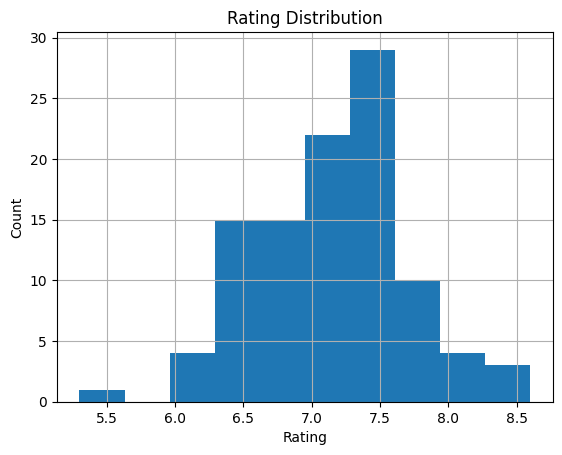

In [28]:
films_clean["rating"].hist(bins=10)
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


In [29]:
oscars_df.head()

,Ceremony,Year,Class,CanonicalCategory,Category,NomId,Film,FilmId,Name,Nominees,NomineeIds,Winner,Detail,Note,Citation,MultifilmNomination,YearStart
0,96,2023,Acting,ACTOR IN A LEADING ROLE,ACTOR IN A LEADING ROLE,an2043506,Maestro,tt5535276,Bradley Cooper,Bradley Cooper,nm0177896,NaN,Leonard Bernstein,NaN,NaN,NaN,2023
1,96,2023,Acting,ACTOR IN A LEADING ROLE,ACTOR IN A LEADING ROLE,an2043507,Rustin,tt14160834,Colman Domingo,Colman Domingo,nm0231458,NaN,Bayard Rustin,NaN,NaN,NaN,2023
2,96,2023,Acting,ACTOR IN A LEADING ROLE,ACTOR IN A LEADING ROLE,an2043505,The Holdovers,tt14849194,Paul Giamatti,Paul Giamatti,nm0316079,NaN,Paul Hunham,NaN,NaN,NaN,2023
3,96,2023,Acting,ACTOR IN A LEADING ROLE,ACTOR IN A LEADING ROLE,an2043504,Oppenheimer,tt15398776,Cillian Murphy,Cillian Murphy,nm0614165,True,J. Robert Oppenheimer,NaN,NaN,NaN,2023
4,96,2023,Acting,ACTOR IN A LEADING ROLE,ACTOR IN A LEADING ROLE,an2043508,American Fiction,tt23561236,Jeffrey Wright,Jeffrey Wright,nm0942482,NaN,Thelonious ‘Monk’ Ellison,NaN,NaN,NaN,2023


In [30]:
oscars_df.shape
oscars_df.info()


<class 'pandas.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Ceremony             240 non-null    int64  
 1   Year                 240 non-null    int64  
 2   Class                240 non-null    str    
 3   CanonicalCategory    240 non-null    str    
 4   Category             240 non-null    str    
 5   NomId                240 non-null    str    
 6   Film                 240 non-null    str    
 7   FilmId               240 non-null    str    
 8   Name                 240 non-null    str    
 9   Nominees             230 non-null    str    
 10  NomineeIds           230 non-null    str    
 11  Winner               46 non-null     object 
 12  Detail               50 non-null     str    
 13  Note                 0 non-null      float64
 14  Citation             0 non-null      float64
 15  MultifilmNomination  0 non-null      float64
 16  Y

In [31]:
oscars_clean = oscars_df.copy()


In [32]:
oscars_clean.columns = (oscars_clean.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)

oscars_clean.columns


Index(['ceremony', 'year', 'class', 'canonicalcategory', 'category', 'nomid',
       'film', 'filmid', 'name', 'nominees', 'nomineeids', 'winner', 'detail',
       'note', 'citation', 'multifilmnomination', 'yearstart'],
      dtype='str')

In [33]:
oscars_clean.isna().sum()


ceremony                 0
year                     0
class                    0
canonicalcategory        0
category                 0
nomid                    0
film                     0
filmid                   0
name                     0
nominees                10
nomineeids              10
winner                 194
detail                 190
note                   240
citation               240
multifilmnomination    240
yearstart                0
dtype: int64

In [34]:
oscars_clean = oscars_clean.drop_duplicates()


In [35]:
text_cols = ["film", "name", "category", "class", "canonicalcategory"]
for col in text_cols:
    if col in oscars_clean.columns:
        oscars_clean[col] = oscars_clean[col].astype(str).str.strip()



In [36]:
oscars_clean["year"] = oscars_clean["year"].astype(int)
oscars_clean["year"].unique()


array([2023, 2024])

In [37]:
oscars_clean["winner"] = oscars_clean["winner"].fillna(False)
oscars_clean["winner"] = oscars_clean["winner"].astype(bool).astype(int)


In [38]:
oscars_clean["winner"].value_counts()



winner
0    194
1     46
Name: count, dtype: int64

In [39]:

print(oscars_clean["winner"].unique())

print(oscars_clean["winner"].value_counts(dropna=False))

print(oscars_clean["winner"].dtype)


[0 1]
winner
0    194
1     46
Name: count, dtype: int64
int64


In [40]:
print("Unique values in winner column BEFORE cleaning:")
print(oscars_df["Winner"].unique())


Unique values in winner column BEFORE cleaning:
[nan True]


In [41]:

oscars_clean["winner"] = oscars_clean["winner"].fillna(False)
oscars_clean["winner"] = oscars_clean["winner"].astype(bool).astype(int)


In [42]:
oscars_clean["winner"].value_counts(dropna=False)


winner
0    194
1     46
Name: count, dtype: int64

In [43]:
oscars_clean.isna().sum()


ceremony                 0
year                     0
class                    0
canonicalcategory        0
category                 0
nomid                    0
film                     0
filmid                   0
name                     0
nominees                10
nomineeids              10
winner                   0
detail                 190
note                   240
citation               240
multifilmnomination    240
yearstart                0
dtype: int64

In [44]:
oscars_clean["detail"] = oscars_clean["detail"].fillna("")
oscars_clean["nominees"] = oscars_clean["nominees"].fillna("unknown")
oscars_clean["nomineeids"] = oscars_clean["nomineeids"].fillna("unknown")


In [45]:
oscars_clean[["name", "film", "winner"]].head(10)


,name,film,winner
0,Bradley Cooper,Maestro,0
1,Colman Domingo,Rustin,0
2,Paul Giamatti,The Holdovers,0
3,Cillian Murphy,Oppenheimer,1
4,Jeffrey Wright,American Fiction,0
5,Sterling K. Brown,American Fiction,0
6,Robert De Niro,Killers of the Flower Moon,0
7,Robert Downey Jr.,Oppenheimer,1
8,Ryan Gosling,Barbie,0
9,Mark Ruffalo,Poor Things,0


In [46]:
oscars_clean["winner"].dtype


dtype('int64')

In [47]:
oscars_clean = oscars_clean.drop(
    columns=["note", "citation", "multifilmnomination"],
    errors="ignore"
)


In [48]:
oscars_clean["detail"] = oscars_clean["detail"].fillna("")
oscars_clean["nominees"] = oscars_clean["nominees"].fillna("unknown")
oscars_clean["nomineeids"] = oscars_clean["nomineeids"].fillna("unknown")


In [49]:
text_cols = ["class", "canonicalcategory", "category",
             "film", "name", "nominees", "detail"]

for col in text_cols:
    if col in oscars_clean.columns:
        oscars_clean[col] = oscars_clean[col].astype(str).str.strip()


In [50]:
oscars_clean["ceremony"] = oscars_clean["ceremony"].astype(int)
oscars_clean["yearstart"] = oscars_clean["yearstart"].astype(int)
oscars_clean = oscars_clean.drop_duplicates(subset=["nomid"])
oscars_clean.isna().sum()



ceremony             0
year                 0
class                0
canonicalcategory    0
category             0
nomid                0
film                 0
filmid               0
name                 0
nominees             0
nomineeids           0
winner               0
detail               0
yearstart            0
dtype: int64

In [51]:

oscars_clean.head()

,ceremony,year,class,canonicalcategory,category,nomid,film,filmid,name,nominees,nomineeids,winner,detail,yearstart
0,96,2023,Acting,ACTOR IN A LEADING ROLE,ACTOR IN A LEADING ROLE,an2043506,Maestro,tt5535276,Bradley Cooper,Bradley Cooper,nm0177896,0,Leonard Bernstein,2023
1,96,2023,Acting,ACTOR IN A LEADING ROLE,ACTOR IN A LEADING ROLE,an2043507,Rustin,tt14160834,Colman Domingo,Colman Domingo,nm0231458,0,Bayard Rustin,2023
2,96,2023,Acting,ACTOR IN A LEADING ROLE,ACTOR IN A LEADING ROLE,an2043505,The Holdovers,tt14849194,Paul Giamatti,Paul Giamatti,nm0316079,0,Paul Hunham,2023
3,96,2023,Acting,ACTOR IN A LEADING ROLE,ACTOR IN A LEADING ROLE,an2043504,Oppenheimer,tt15398776,Cillian Murphy,Cillian Murphy,nm0614165,1,J. Robert Oppenheimer,2023
4,96,2023,Acting,ACTOR IN A LEADING ROLE,ACTOR IN A LEADING ROLE,an2043508,American Fiction,tt23561236,Jeffrey Wright,Jeffrey Wright,nm0942482,0,Thelonious ‘Monk’ Ellison,2023


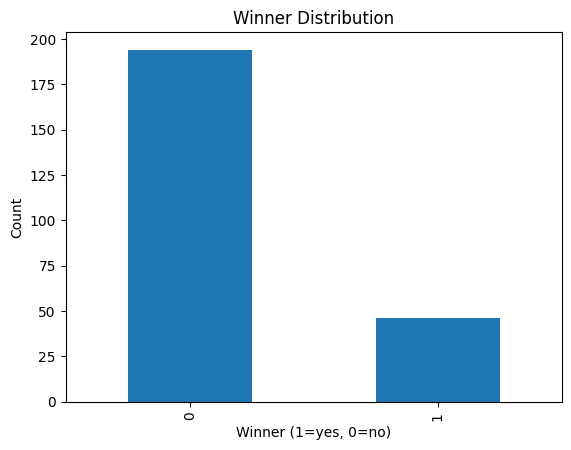

In [52]:
oscars_clean["winner"].value_counts().plot(kind="bar")
plt.title("Winner Distribution")
plt.xlabel("Winner (1=yes, 0=no)")
plt.ylabel("Count")
plt.show()


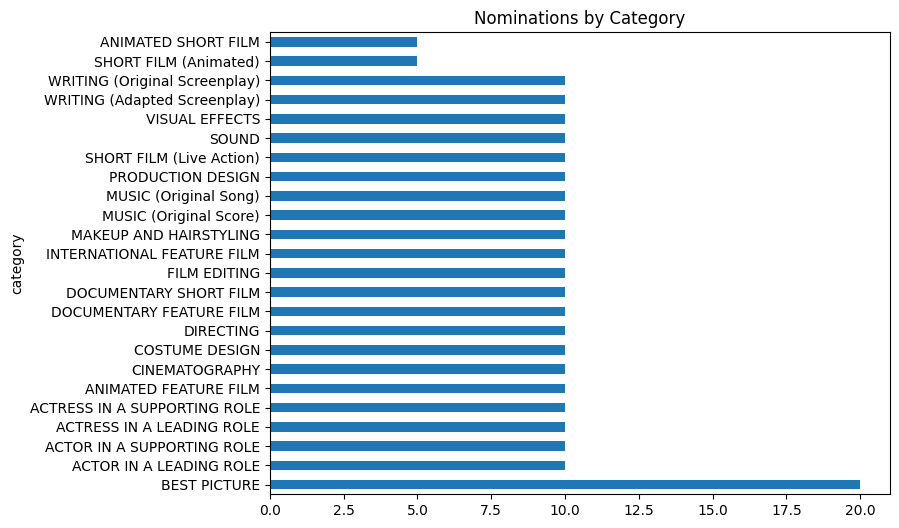

In [53]:
oscars_clean["category"].value_counts().plot(kind="barh", figsize=(8,6))
plt.title("Nominations by Category")
plt.show()


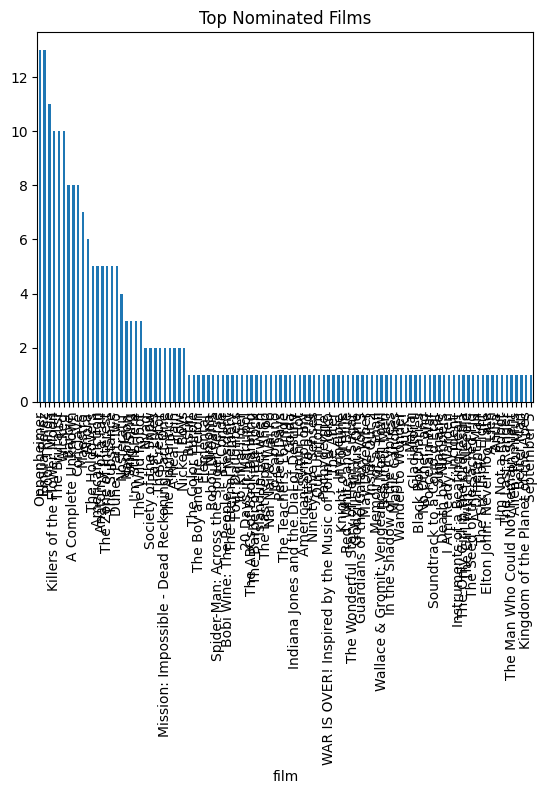

In [54]:
oscars_clean["film"].value_counts().plot(kind="bar")
plt.title("Top Nominated Films")
plt.show()


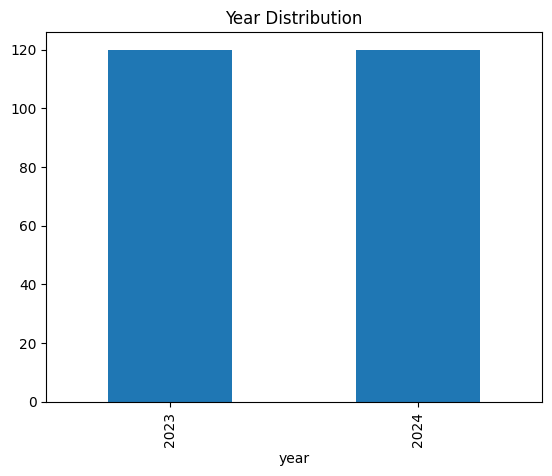

In [55]:
oscars_clean["year"].value_counts().plot(kind="bar")
plt.title("Year Distribution")
plt.show()


In [56]:
streaming_df.head()

,Name,Release Year,Poster,IMdbId,Streaming,Rent,Buy
0,Maestro,2023,https://images.justwatch.com/poster/309336798/...,tt5535276,"['Netflix', 'Netflix Standard with Ads']",[],[]
1,Rustin,2023,https://images.justwatch.com/poster/308914505/...,tt14160834,"['Netflix', 'Netflix Standard with Ads']",[],[]
2,The Holdovers,2023,https://images.justwatch.com/poster/309896363/...,tt14849194,[],"['Amazon Video ($3.99)', 'Apple TV Store ($3.9...","['Amazon DVD / Blu-ray ($None)', 'GRUV ($9.99)..."
3,Oppenheimer,2023,https://images.justwatch.com/poster/305252655/...,tt15398776,[],"['Amazon Video ($3.99)', 'Apple TV Store ($3.9...","['Amazon DVD / Blu-ray ($None)', 'Barnes & Nob..."
4,American Fiction,2023,https://images.justwatch.com/poster/310449652/...,tt23561236,"['Peacock Premium', 'Peacock Premium Plus']","['Amazon Video ($3.99)', 'Fandango At Home ($3...","['Amazon DVD / Blu-ray ($None)', 'Barnes & Nob..."


In [57]:
streaming_df.shape

(92, 7)

In [58]:

streaming_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Name          92 non-null     str  
 1   Release Year  92 non-null     int64
 2   Poster        91 non-null     str  
 3   IMdbId        92 non-null     str  
 4   Streaming     92 non-null     str  
 5   Rent          92 non-null     str  
 6   Buy           92 non-null     str  
dtypes: int64(1), str(6)
memory usage: 5.2 KB


In [59]:
streaming_df.isna().sum()

Name            0
Release Year    0
Poster          1
IMdbId          0
Streaming       0
Rent            0
Buy             0
dtype: int64

In [60]:
streaming_clean = streaming_df.copy()

In [61]:
streaming_clean = streaming_clean.drop_duplicates()

In [62]:
streaming_clean.columns = (streaming_clean.columns.str.strip().str.lower() 
)
streaming_clean.columns = (streaming_clean.columns.str.replace(" ", "_")
)

streaming_clean.columns


Index(['name', 'release_year', 'poster', 'imdbid', 'streaming', 'rent', 'buy'], dtype='str')

In [63]:

list_cols = ["streaming", "rent", "buy"]

for col in list_cols:
    streaming_clean[col] = streaming_clean[col].apply(
        lambda x: ast.literal_eval(x) if isinstance(x, str) else x
    )


In [64]:
for col in list_cols:
    streaming_clean[col] = streaming_clean[col].apply(
        lambda x: x if isinstance(x, list) else []
    )


In [65]:
streaming_clean = streaming_clean.drop_duplicates(subset=["imdbid"])


In [66]:
streaming_clean.info()

<class 'pandas.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          92 non-null     str   
 1   release_year  92 non-null     int64 
 2   poster        91 non-null     str   
 3   imdbid        92 non-null     str   
 4   streaming     92 non-null     object
 5   rent          92 non-null     object
 6   buy           92 non-null     object
dtypes: int64(1), object(3), str(3)
memory usage: 5.2+ KB


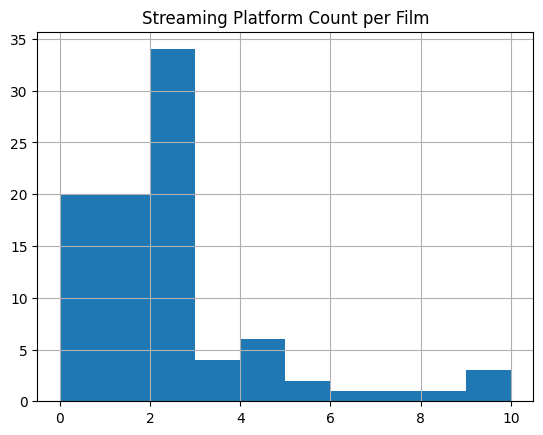

In [67]:
streaming_clean["num_streaming"] = streaming_clean["streaming"].apply(len)

streaming_clean["num_streaming"].hist()
plt.title("Streaming Platform Count per Film")
plt.show()


In [68]:
streaming_table = streaming_clean[["imdbid", "streaming"]].explode("streaming")
streaming_table.head()


,imdbid,streaming
0,tt5535276,Netflix
0,tt5535276,Netflix Standard with Ads
1,tt14160834,Netflix
1,tt14160834,Netflix Standard with Ads
2,tt14849194,NaN


In [69]:
print("Missing values:")
print(streaming_clean.isna().sum())

print("\nDuplicates (imdbid):")
print(streaming_clean.duplicated(subset=["imdbid"]).sum())

print("\nData types:")
print(streaming_clean.dtypes)

print("\nShape:")
print(streaming_clean.shape)


Missing values:
name             0
release_year     0
poster           1
imdbid           0
streaming        0
rent             0
buy              0
num_streaming    0
dtype: int64

Duplicates (imdbid):
0

Data types:
name                str
release_year      int64
poster              str
imdbid              str
streaming        object
rent             object
buy              object
num_streaming     int64
dtype: object

Shape:
(92, 8)


In [70]:
streaming_clean["poster"] = streaming_clean["poster"].fillna("missing")
#ewplaced missing poster with missing, but this is not structual so should be okay

In [71]:
streaming_clean.sample(5)


,name,release_year,poster,imdbid,streaming,rent,buy,num_streaming
73,Burakku bokkusu daiarîzu,2024,https://images.justwatch.com/poster/312804074/...,tt30227076,"[fuboTV, Paramount+ Amazon Channel, Paramount+...","[Amazon Video ($3.99), Apple TV Store ($3.99),...",[Amazon DVD / Blu-ray ($None)],4
0,Maestro,2023,https://images.justwatch.com/poster/309336798/...,tt5535276,"[Netflix, Netflix Standard with Ads]",[],[],2
85,Elton John: Never Too Late,2024,https://images.justwatch.com/poster/321254501/...,tt20316978,[Disney Plus],[],[],1
42,The After,2024,https://images.justwatch.com/poster/309081915/...,tt28532006,"[Netflix, Netflix Standard with Ads]",[],[],2
57,Wicked,2024,https://images.justwatch.com/poster/322412111/...,tt1262426,"[Amazon Prime Video, Amazon Prime Video with Ads]","[Amazon Video ($3.99), Apple TV Store ($3.99),...",[],2


In [72]:
type(streaming_clean["streaming"].iloc[0]), type(streaming_clean["rent"].iloc[0]), type(streaming_clean["buy"].iloc[0])


(list, list, list)

In [73]:
(streaming_clean["streaming"].apply(len) == 0).sum(), \
(streaming_clean["rent"].apply(len) == 0).sum(), \
(streaming_clean["buy"].apply(len) == 0).sum()


(np.int64(20), np.int64(35), np.int64(40))

In [74]:
streaming_clean["num_streaming"] = streaming_clean["streaming"].apply(len)
streaming_clean[["name", "streaming", "num_streaming"]].sample(5)


,name,streaming,num_streaming
20,La memoria infinita,"[Paramount+ Roku Premium Channel, Paramount+ M...",4
24,The Barber of Little Rock,[],0
0,Maestro,"[Netflix, Netflix Standard with Ads]",2
90,Kingdom of the Planet of the Apes,[Hulu],1
55,Anora,[Hulu],1


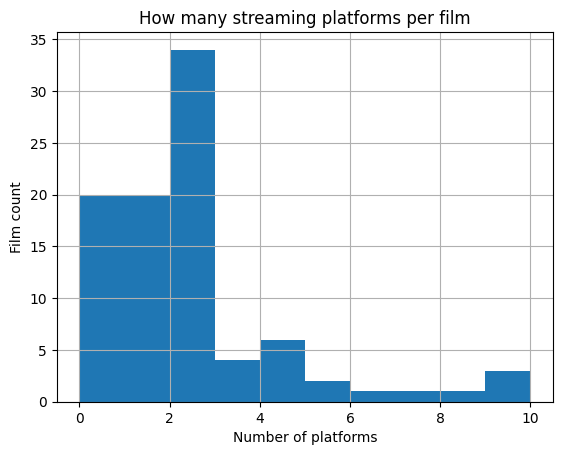

In [75]:
streaming_clean["num_streaming"].hist(bins=10)
plt.title("How many streaming platforms per film")
plt.xlabel("Number of platforms")
plt.ylabel("Film count")
plt.show()


In [76]:
# Paths
films_clean_path = "transformed_data/films_clean_data.csv"
oscars__clean_path = "transformed_data/oscars_clean_data.csv"
streaming_clean_path = "transformed_data/streaming_clean_data.csv"

# --- OSCARS DATA ---
oscars_clean.to_csv(oscars__clean_path, index=False)

# --- FILM STREAMING DATA ---
films_clean.to_csv(films_clean_path, index=False)

## --- Streaming Clean
streaming_clean.to_csv(streaming_clean_path, index=False)